# Code to train the models

Below, the command line arguments to call the training pipeline for the triplet and siamese model can be found.

In [ ]:
! python DL-SBert/Scripts/train_siamese.py --epochs=3 --train_batch_size=64 --metric=cosine

In [ ]:
! python DL-SBert/Scripts/train_siamese.py --epochs=3 --train_batch_size=64 --metric=euclidean

In [ ]:
! python DL-SBert/Scripts/train_triplet.py --epochs=3 --train_batch_size=64 --metric=cosine

In [ ]:
! python DL-SBert/Scripts/train_triplet.py --epochs=3 --train_batch_size=64 --metric=euclidean

# Plotting of information retrieval scoring metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import math

### The scores are stored in dictionaries extracted from the logs from the evaluation runs

In [31]:
cos_triplet={'accuracy@k': {1: 0.505, 5: 0.655, 10: 0.705}, 'precision@k': {1: 0.505, 5: 0.39299999999999996, 10: 0.331}, 'recall@k': {1: 0.0017823651385161403, 5: 0.004982738852571168, 10: 0.007535816152489125}, 'ndcg@k': {1: 0.505, 5: 0.41673904686338603, 10: 0.3657945540910379}, 'mrr@k': {1: 0.505, 5: 0.56125, 10: 0.5674027777777778}, 'map@k': {100: 0.06813971830524208}}
cos_siamese={'accuracy@k': {1: 0.755, 5: 0.895, 10: 0.925}, 'precision@k': {1: 0.755, 5: 0.667, 10: 0.599}, 'recall@k': {1: 0.0034160187921697936, 5: 0.00802408294983796, 10: 0.014397964164012837}, 'ndcg@k': {1: 0.755, 5: 0.6864890060690588, 10: 0.6338682747596464}, 'mrr@k': {1: 0.755, 5: 0.8072500000000001, 10: 0.8114166666666667}, 'map@k': {100: 0.3002451007791306}}
euclid_triplet={'accuracy@k': {1: 0.765, 5: 0.9, 10: 0.925}, 'precision@k': {1: 0.765, 5: 0.6430000000000001, 10: 0.56}, 'recall@k': {1: 0.0042408336069846096, 5: 0.010205604034513658, 10: 0.013535155517513418}, 'ndcg@k': {1: 0.765, 5: 0.66816865640248, 10: 0.6033292807248647}, 'mrr@k': {1: 0.765, 5: 0.8170833333333332, 10: 0.8206448412698408}, 'map@k': {100: 0.19295540967956004}}
euclid_siamese={'accuracy@k': {1: 0.675, 5: 0.845, 10: 0.89}, 'precision@k': {1: 0.675, 5: 0.5790000000000001, 10: 0.5245000000000001}, 'recall@k': {1: 0.004020698471849473, 5: 0.00993053298559834, 10: 0.013507863706382068}, 'ndcg@k': {1: 0.675, 5: 0.6021249439605582, 10: 0.5579223092592904}, 'mrr@k': {1: 0.675, 5: 0.7394166666666666, 10: 0.7457559523809523}, 'map@k': {100: 0.2402010774937765}}

### Make plotting function and extract data to lists


In [19]:

# Function to plot bar chart with hatching
def plot_with_hatching(data_values, index, label, color_lab, alpha):
    if 'Cos' in label:
        plt.bar(index, data_values, bar_width, label=label, color=color_lab[1], alpha=alpha)
    else:
        plt.bar(index, data_values, bar_width, label=label, color=color_lab[0], alpha=alpha)

# Precision comparison plot
plt.figure(figsize=(10, 8))


# Define bar width and separation between different models' bars
bar_width = 0.2  # Adjust this based on the visualization preference

# Generating index values for the x-axis
precision_metrics = ['1', '5', '10']
index_precision = np.arange(len(precision_metrics))


cos_siamese_precision_values = [cos_siamese['precision@k'][1], cos_siamese['precision@k'][5], cos_siamese['precision@k'][10]]
precision_euclidean_siamese = [euclid_siamese['precision@k'][1], euclid_siamese['precision@k'][5], euclid_siamese['precision@k'][10]]
cos_triplet_precision_values = [cos_triplet['precision@k'][1], cos_triplet['precision@k'][5], cos_triplet['precision@k'][10]]
precision_euclidean_triplet = [euclid_triplet['precision@k'][1], euclid_triplet['precision@k'][5], euclid_triplet['precision@k'][10]]

# Accuracy values
cos_siamese_accuracy_values = [cos_siamese['accuracy@k'][1], cos_siamese['accuracy@k'][5], cos_siamese['accuracy@k'][10]]
acurracy_euclidean_siamese = [euclid_siamese['accuracy@k'][1], euclid_siamese['accuracy@k'][5], euclid_siamese['accuracy@k'][10]]
cos_triplet_accuracy_values = [cos_triplet['accuracy@k'][1], cos_triplet['accuracy@k'][5], cos_triplet['accuracy@k'][10]]
acurracy_euclidean_triplet = [euclid_triplet['accuracy@k'][1], euclid_triplet['accuracy@k'][5], euclid_triplet['accuracy@k'][10]]

# MRR values
cos_siamese_mrr_values = [cos_siamese['mrr@k'][1], cos_siamese['mrr@k'][5], cos_siamese['mrr@k'][10]]
mrr_euclidean_siamese = [euclid_siamese['mrr@k'][1], euclid_siamese['mrr@k'][5], euclid_siamese['mrr@k'][10]]
cos_triplet_mrr_values = [cos_triplet['mrr@k'][1], cos_triplet['mrr@k'][5], cos_triplet['mrr@k'][10]]
mrr_euclidean_triplet = [euclid_triplet['mrr@k'][1], euclid_triplet['mrr@k'][5], euclid_triplet['mrr@k'][10]]

# NDCG values
cos_siamese_ndcg_values = [cos_siamese['ndcg@k'][1], cos_siamese['ndcg@k'][5], cos_siamese['ndcg@k'][10]]
ndcg_euclidean_siamese = [euclid_siamese['ndcg@k'][1], euclid_siamese['ndcg@k'][5], euclid_siamese['ndcg@k'][10]]
cos_triplet_ndcg_values = [cos_triplet['ndcg@k'][1], cos_triplet['ndcg@k'][5], cos_triplet['ndcg@k'][10]]
ndcg_euclidean_triplet = [euclid_triplet['ndcg@k'][1], euclid_triplet['ndcg@k'][5], euclid_triplet['ndcg@k'][10]]




NameError: name 'cos_siamese' is not defined

<Figure size 720x576 with 0 Axes>

# Ploting the results

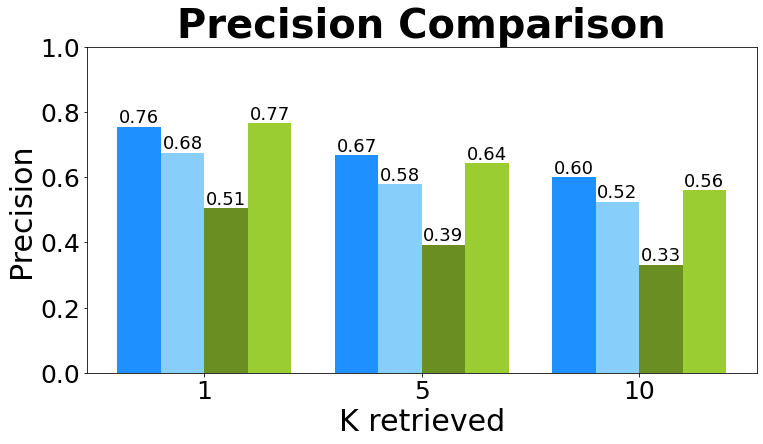

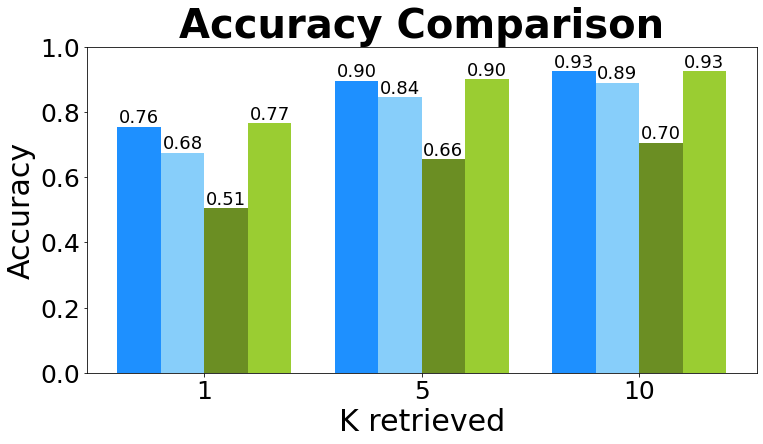

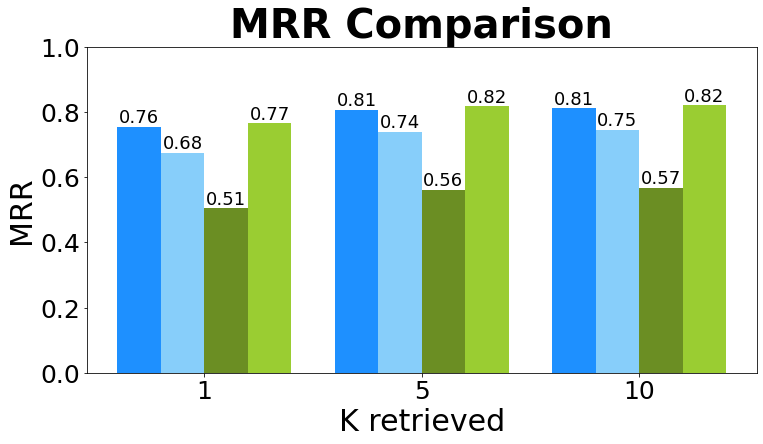

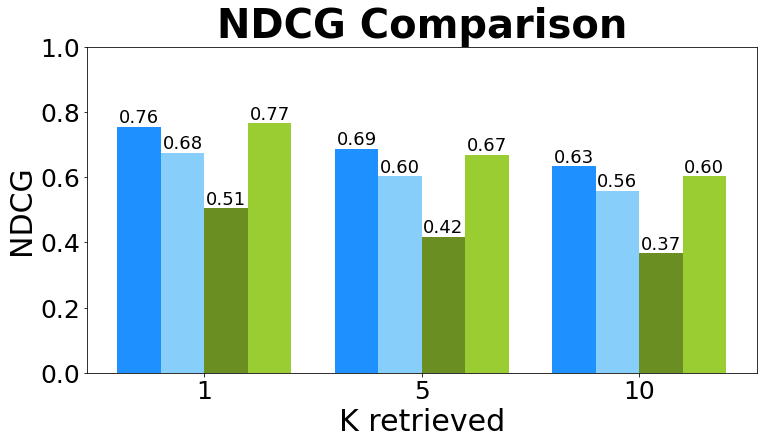

In [36]:

# Define colors
siamese_color = ['lightskyblue','dodgerblue']
triplet_color = ['yellowgreen','olivedrab']

xlab_size = 30
title_size = 40
x_tick_size = 25

# Plotting with modified colors and hatching
bar_width = 0.2
hatching = '/'
hatching_color = 'black'

# Function to plot bar chart with hatching and values on top
def plot_with_hatching_and_values(data_values, index, label, color_lab, alpha):
    if 'Cos' in label:
        rects = plt.bar(index, data_values, bar_width, label=label, color=color_lab[1], alpha=alpha)
    else:
        rects = plt.bar(index, data_values, bar_width, label=label, color=color_lab[0], alpha=alpha)
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, '%.2f' % height, ha='center', va='bottom', fontsize=18)

# Precision comparison plot
plt.figure(figsize=(12, 6))

plot_with_hatching_and_values(cos_siamese_precision_values, index_precision, 'Cos Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(precision_euclidean_siamese, index_precision + bar_width, 'Euclid Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(cos_triplet_precision_values, index_precision + bar_width * 2, 'Cos Triplet', triplet_color, 1.0)
plot_with_hatching_and_values(precision_euclidean_triplet, index_precision + bar_width * 3, 'Euclid Triplet', triplet_color, 1.0)

plt.xlabel('K retrieved', fontsize=xlab_size)
plt.ylabel('Precision', fontsize=xlab_size)
plt.title('Precision Comparison', fontsize=title_size,fontweight="bold")
plt.xticks(index_precision + bar_width * 1.5, precision_metrics, fontsize=x_tick_size)
plt.yticks(fontsize=x_tick_size)
#plt.legend(fontsize=15)
plt.ylim(0, 1)
plt.savefig('precision_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

# Accuracy comparison plot
plt.figure(figsize=(12, 6))

plot_with_hatching_and_values(cos_siamese_accuracy_values, index_precision, 'Cos Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(acurracy_euclidean_siamese, index_precision + bar_width, 'Euclid Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(cos_triplet_accuracy_values, index_precision + bar_width * 2, 'Cos Triplet', triplet_color, 1.0)
plot_with_hatching_and_values(acurracy_euclidean_triplet, index_precision + bar_width * 3, 'Euclid Triplet', triplet_color, 1.0)

plt.xlabel('K retrieved', fontsize=xlab_size)
plt.ylabel('Accuracy', fontsize=xlab_size)
plt.title('Accuracy Comparison', fontsize=title_size,fontweight="bold")
plt.xticks(index_precision + bar_width * 1.5, precision_metrics, fontsize=x_tick_size)
plt.yticks(fontsize=x_tick_size)
#plt.legend(fontsize=15)
plt.ylim(0, 1)
plt.savefig('acuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# MRR comparison plot
plt.figure(figsize=(12, 6))

plot_with_hatching_and_values(cos_siamese_mrr_values, index_precision, 'Cos Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(mrr_euclidean_siamese, index_precision + bar_width, 'Euclid Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(cos_triplet_mrr_values,index_precision + bar_width * 2, 'Cos Triplet', triplet_color, 1.0)
plot_with_hatching_and_values(mrr_euclidean_triplet, index_precision + bar_width * 3, 'Euclid Triplet', triplet_color, 1.0)

plt.xlabel('K retrieved', fontsize=xlab_size)
plt.ylabel('MRR', fontsize=xlab_size)
plt.title('MRR Comparison', fontsize=title_size,fontweight="bold")
plt.xticks(index_precision + bar_width * 1.5, precision_metrics, fontsize=x_tick_size)
plt.yticks(fontsize=x_tick_size)
#plt.legend(fontsize=15, loc='upper left')
plt.ylim(0, 1)
plt.savefig('mrr_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# NDCG comparison plot
plt.figure(figsize=(12, 6))

plot_with_hatching_and_values(cos_siamese_ndcg_values, index_precision, 'Cos Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(ndcg_euclidean_siamese,index_precision + bar_width, 'Euclid Siamese', siamese_color, 1.0)
plot_with_hatching_and_values(cos_triplet_ndcg_values, index_precision + bar_width * 2, 'Cos Triplet', triplet_color, 1.0)
plot_with_hatching_and_values(ndcg_euclidean_triplet, index_precision + bar_width * 3, 'Euclid Triplet', triplet_color, 1.0)

plt.xlabel('K retrieved', fontsize=xlab_size)
plt.ylabel('NDCG', fontsize=xlab_size)
plt.title('NDCG Comparison', fontsize=title_size,fontweight="bold")
plt.xticks(index_precision + bar_width * 1.5, precision_metrics, fontsize=x_tick_size)
plt.yticks(fontsize=x_tick_size)
#plt.legend(fontsize=15)
plt.ylim(0, 1)
plt.savefig('ndcg_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



# Plotting PCA visualisation of embedding space

This can only be run in a file structure in which the sentence_transformer_dtu is available and also each model has be available in a path.
Remember to change this in the to of the script!

Plotting with static data can be seen below!

In [ ]:
import os
import tarfile
import json
from sentence_transformer_dtu import SentenceTransformer, util, models, InputExample
import logging
import gzip
import os
import tarfile
import tqdm
from torch.utils.data import Dataset
import pickle
import argparse
import numpy as np
import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--train_batch_size", default=64, type=int)
parser.add_argument("--max_seq_length", default=300, type=int)
parser.add_argument("--model_name",default="bert-base-uncased")
parser.add_argument("--max_passages", default=0, type=int)
parser.add_argument("--epochs", default=10, type=int)
parser.add_argument("--pooling", default="mean")
parser.add_argument("--negs_to_use", default=None, help="From which systems should negatives be used? Multiple systems seperated by comma. None = all")
parser.add_argument("--warmup_steps", default=1000, type=int)
parser.add_argument("--lr", default=2e-5, type=float)
parser.add_argument("--num_negs_per_system", default=5, type=int)
parser.add_argument("--use_pre_trained_model", default=False, action="store_true")
parser.add_argument("--use_all_queries", default=False, action="store_true")
parser.add_argument("--ce_score_margin", default=3.0, type=float)
parser.add_argument("--evaluation_steps", default=10000, type=int)
args = parser.parse_args()


model_dict={"Cos_Siamese":"/zhome/d2/a/175738/ML_BERT/DL-SBert/Scripts/siamese_cosine",
            "Euclid_Siamese":"/zhome/d2/a/175738/ML_BERT/DL-SBert/Scripts/siamese_euclid",
            "Cos_Triplet":"/zhome/d2/a/175738/ML_BERT/DL-SBert/Scripts/triplet_cosine",
            "Euclid_Triplet":"/zhome/d2/a/175738/ML_BERT/DL-SBert/Scripts/triplet_euclid"}

for key in model_dict.keys():
    #logging information
    logging.basicConfig(filename=f'PCA_{key}.log', filemode='w', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S', level=logging.INFO)


    # First we want to load the corpus, queries and CE scores

    ### Now we read the MS Marco dataset
    data_folder = "/zhome/d2/a/175738/ML_BERT/DL-SBert/msmarco-data"

    #### Read the corpus files, that contain all the passages. Store them in the corpus dict
    corpus = {}         #dict in the format: passage_id -> passage. Stores all existent passages
    corpus_list=[]
    collection_filepath = os.path.join(data_folder, 'collection.tsv')
    if not os.path.exists(collection_filepath):
        tar_filepath = os.path.join(data_folder, 'collection.tar.gz')
        if not os.path.exists(tar_filepath):
            logging.info("Download collection.tar.gz")
            util.http_get('https://msmarco.blob.core.windows.net/msmarcoranking/collection.tar.gz', tar_filepath)

        with tarfile.open(tar_filepath, "r:gz") as tar:
            tar.extractall(path=data_folder)

    logging.info("Read corpus: collection.tsv")
    with open(collection_filepath, 'r', encoding='utf8') as fIn:
        for i, line in enumerate(fIn):
            #if i <= 100:
            pid, passage = line.strip().split("\t")
            pid = int(pid)
            corpus[pid] = passage
            corpus_list.append(passage)


    ### Read the train queries, store in queries dict
    queries = {}        #dict in the format: query_id -> query. Stores all training queries
    query_list=[]
    queries_filepath = os.path.join(data_folder, 'queries.train.tsv')
    if not os.path.exists(queries_filepath):
        tar_filepath = os.path.join(data_folder, 'queries.tar.gz')
        if not os.path.exists(tar_filepath):
            logging.info("Download queries.tar.gz")
            util.http_get('https://msmarco.blob.core.windows.net/msmarcoranking/queries.tar.gz', tar_filepath)

        with tarfile.open(tar_filepath, "r:gz") as tar:
            tar.extractall(path=data_folder)


    with open(queries_filepath, 'r', encoding='utf8') as fIn:
        for i, line in enumerate(fIn):
            #if i <= 100:
            qid, query = line.strip().split("\t")
            qid = int(qid)
            queries[qid] = query
            query_list.append(query)

    #unique_qids = set(queries.keys())
    #unique_pids = set(corpus.keys())

    # Load a dict (qid, pid) -> ce_score that maps query-ids (qid) and paragraph-ids (pid)
    # to the CrossEncoder score computed by the cross-encoder/ms-marco-MiniLM-L-6-v2 model
    ce_scores_file = os.path.join(data_folder, 'cross-encoder-ms-marco-MiniLM-L-6-v2-scores.pkl.gz')
    if not os.path.exists(ce_scores_file):
        logging.info("Download cross-encoder scores file")
        util.http_get('https://huggingface.co/datasets/sentence-transformers/msmarco-hard-negatives/resolve/main/cross-encoder-ms-marco-MiniLM-L-6-v2-scores.pkl.gz', ce_scores_file)

    logging.info("Load CrossEncoder scores dict")
    with gzip.open(ce_scores_file, 'rb') as fIn:
        ce_scores = pickle.load(fIn)

    # As training data we use hard-negatives that have been mined using various systems
    hard_negatives_filepath = os.path.join(data_folder, 'msmarco-hard-negatives.jsonl.gz')
    if not os.path.exists(hard_negatives_filepath):
        logging.info("Download cross-encoder scores file")
        util.http_get('https://huggingface.co/datasets/sentence-transformers/msmarco-hard-negatives/resolve/main/msmarco-hard-negatives.jsonl.gz', hard_negatives_filepath)

    logging.info("Read hard negatives train file")
    train_queries = {}
    negs_to_use = None
    with gzip.open(hard_negatives_filepath, 'rt') as fIn:
        for line in tqdm.tqdm(fIn):
            data = json.loads(line)

            #Get the positive passage ids

            qid = data['qid']
            pos_pids = data['pos']

            #if qid not in unique_qids and pos_pids not in unique_pids:
            #continue

            if len(pos_pids) == 0:  #Skip entries without positives passages
                continue

            pos_min_ce_score = min([ce_scores[qid][pid] for pid in data['pos']])
            ce_score_threshold = pos_min_ce_score - args.ce_score_margin

            #Get the hard negatives
            neg_pids = set()
            if negs_to_use is None:
                if args.negs_to_use is not None:    #Use specific system for negatives
                    negs_to_use = args.negs_to_use.split(",")
                else:   #Use all systems
                    negs_to_use = list(data['neg'].keys())
                logging.info("Using negatives from the following systems: {}".format(", ".join(negs_to_use)))

            for system_name in negs_to_use:
                if system_name not in data['neg']:
                    continue

                system_negs = data['neg'][system_name]
                negs_added = 0
                for pid in system_negs:
                    #if pid not in unique_pids:
                    #   continue

                    if ce_scores[qid][pid] > ce_score_threshold:
                        continue

                    if pid not in neg_pids:
                        neg_pids.add(pid)
                        negs_added += 1
                        if negs_added >= args.num_negs_per_system:
                            break
            #print("Got here")
            if args.use_all_queries or (len(pos_pids) > 0 and len(neg_pids) > 0):
                train_queries[data['qid']] = {'qid': data['qid'], 'query': queries[data['qid']], 'pos': pos_pids, 'neg': neg_pids}



    logging.info("Train queries: {}".format(len(train_queries)))



    # We create a custom MSMARCO dataset that returns triplets (query, positive, negative)
    # on-the-fly based on the information from the mined-hard-negatives jsonl file.
    class MSMARCODataset(Dataset):
        def __init__(self, queries, corpus):
            self.queries = queries
            self.queries_ids = list(queries.keys())
            #self.pct5_threshold = int(query_total*0.05)
            self.corpus = corpus
            
            # make list to store the 
            self.anchors = []
            self.positives = []
            self.negatives = []

            for qid in self.queries:

                # store the negatives for the positive examples
                negs = self.queries[qid]['neg']
                neg_count = len(negs)
                
                # only take the first positive (in some cases there are two, but these are disregarded)
                pos_id = self.queries[qid]['pos'][0]
                
                # append same length of anchors, negatives and positives
                self.anchors += [qid]*neg_count
                self.positives += [pos_id]*neg_count
                self.negatives += negs
                    
                #self.queries[qid]['pos'] = list(self.queries[qid]['pos'])
                #self.queries[qid]['neg'] = list(self.queries[qid]['neg'])
                #random.shuffle(self.queries[qid]['neg'])
            assert len(self.negatives) == len(self.positives)
            assert len(self.negatives) == len(self.anchors)
            logging.info(f"Total examples: {len(self.anchors)}")

        def __getitem__(self, item):
            query = self.queries[self.anchors[item]]
            query_text = query['query']

            pos_id = self.positives[item]  
            pos_text = self.corpus[pos_id]

            neg_id = self.negatives[item]  
            neg_text = self.corpus[neg_id]

            return InputExample(texts=[query_text, pos_text, neg_text])

        def __len__(self):
            return len(self.anchors)

        

    # Now we load the model that we have trained


    logging.info("Loading model")
    # Specify the path to the model
    print(os.getcwd())
    #Absolute path to model
    model_path = model_dict[key] 
    #check if path exists
    logging.info(os.path.exists(model_path))
    logging.info(model_path)
    # Load the model
    model = SentenceTransformer(model_path)
    logging.info("Model loaded!")


    #now we encode the whole corpus
    corpus_query=corpus_list+query_list
    logging.info(f"Proceeding to encode {len(corpus_query)} queries and passages")
    logging.info(f'We have {len(corpus_list)} passages in corpus and {len(query_list)} queries')

    #try a small subset
    train_dataset = MSMARCODataset(train_queries, corpus=corpus)
    corp_quer=[]
    for idx in range(70000):
        query = train_dataset.queries[train_dataset.anchors[idx]]
        query_text = query['query']
        
        pos_id = train_dataset.positives[idx]  
        pos_text = train_dataset.corpus[pos_id]

        neg_id = train_dataset.negatives[idx]  
        neg_text = train_dataset.corpus[neg_id]

        corp_quer.append(query_text)
        corp_quer.append(pos_text)
        corp_quer.append(neg_text)

    logging.info(f"encoding {len(corp_quer)} texts")
    encodings=model.encode(corp_quer,show_progress_bar=True,normalize_embeddings=True) #corpus_query[:2000]

    #Doing the PCA
    pca=PCA(n_components=2)
    data_2d=encodings

    #Normalize the data 
    mean_data_set=np.mean(data_2d, axis=0)
    std_data_set=np.std(data_2d, axis=0)

    data_normalized = (data_2d - mean_data_set) / std_data_set

    pca.fit(data_normalized) # used to be data_normalized
    logging.info(f"PCA fit got {pca.explained_variance_ratio_}")


    # Transform the data to reduced dimensions
    query_encode=model.encode(query_list[:100])
    query_encode_normalised=(query_encode-mean_data_set)/std_data_set

    corpus_encode=model.encode(corpus_list[:100])
    corpus_encode_normalised=(corpus_encode-mean_data_set)/std_data_set

    queries_reduced = pca.transform(query_encode_normalised)
    corpus_reduced = pca.transform(corpus_encode_normalised)

    #Hardcode a triplets

    # For training the SentenceTransformer model, we need a dataset, a dataloader, and a loss used for training.
    train_dataset = MSMARCODataset(train_queries, corpus=corpus)
    indexes=[0,10000,30000,50000,60000]
    triplets=[]
    for idx in indexes:
        query = train_dataset.queries[train_dataset.anchors[idx]]
        query_text = query['query']

        pos_id = train_dataset.positives[idx]  
        pos_text = train_dataset.corpus[pos_id]

        neg_id = train_dataset.negatives[idx]  
        neg_text = train_dataset.corpus[neg_id]
        triplets.append([query_text,pos_text,neg_text])
    logging.info([x for x in triplets[:5]])
    triplets_encoded_norm=[]
    triplets_reduced=[]
    for triplet in triplets:
        
        temp_encode=model.encode(triplet,normalize_embeddings=True) # maybe we are double normalising...
        temp_encode_norm=(temp_encode-mean_data_set)/std_data_set
        triplets_reduced.append(pca.transform(temp_encode_norm)) # used to be temp_encode_norm

        #calculate the pairwise euclidian distance
        quer_pos=np.linalg.norm(temp_encode[0]-temp_encode[1])
        quer_neg=np.linalg.norm(temp_encode[0]-temp_encode[2])
        logging.info(f"The triplet {triplet} has the euclidian distance of query to pos of {quer_pos} and query to neg of {quer_neg}")

    # Plotting the embeddings in 2D
    plt.figure(figsize=(8, 6))
    #plt.scatter(queries_reduced[:, 0], queries_reduced[:, 1], alpha=0.2,label="queries")
    #plt.scatter(corpus_reduced[:, 0], corpus_reduced[:, 1], alpha=0.2,label="corpus",color="red",marker="x")
    label_dict={0:"Query",1:"Pos",2:"Neg"}
    anot_dict={0:"Q",1:"P",2:"N"}
    marker_dict={0:"x",1:".",2:"v"}
    colors_dict={0:"green",1:"teal",2:"olive",3:"orangered",4:"indigo",5:"darkorchid",6:"red"}
    logging.info(f"triplets_reduced for {key}")
    logging.info(triplets_reduced)
    for x,triplet_reduced in enumerate(triplets_reduced):
        for i,sent in enumerate(triplet_reduced):
            plt.scatter(sent[0],sent[1],color=colors_dict[x],label=label_dict[i],marker=marker_dict[i],s=200)
            #plt.annotate(anot_dict[i]+str(x+1),(sent[0],sent[1]))
    #plt.legend()
    plt.title('2D Embeddings after PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()
    plt.savefig(f'pca_queries_and_corpus_{key}.png')



# Static plotting of PCA results

The data is loaded as static data, extracted from log files of PCA analysis

In [10]:
Cos_Siamese=[np.array([[-8.13833  , -1.4730537],
       [-4.6306486, -1.4929075],
       [-7.6502986, -3.8371396]]), np.array([[-3.4386446, -0.7258451],
       [-6.5860767, -2.475812 ],
       [-4.0012035, -1.7115326]]), np.array([[11.81185  , -3.214579 ],
       [ 5.328941 , -3.4036746],
       [-4.171328 , -2.602124 ]]), np.array([[12.136036  , -0.68274313],
       [-2.2833676 , -0.34938592],
       [-4.6638355 , -0.6634884 ]]), np.array([[15.61013   , -1.2981791 ],
       [-3.8937469 ,  0.07555807],
       [-6.4973435 ,  1.2742705 ]])]

Euclid_siamese=[np.array([[-0.9565408, -5.628927 ],
       [-1.0499792, -6.2088895],
       [-1.5516123, -6.7235994]]), np.array([[2.6147623, 1.7180922],
       [2.156343 , 1.6706125],
       [3.0804396, 1.7894937]]), np.array([[ 0.629133  , -0.19743262],
       [-1.6147714 ,  1.4528961 ],
       [-1.8572358 , -1.6116066 ]]),np.array([[2.6581903 , 5.35648   ],
       [1.456356  , 2.8090887 ],
       [0.49627328, 3.9440231 ]]), np.array([[-1.7456124, 13.649603 ],
       [-4.035931 ,  4.557701 ],
       [-4.950294 ,  3.516371 ]])]

Cos_Triplet=[np.array([[-6.655674 , -3.47689  ],
       [-6.608637 , -3.4359326],
       [16.76736  ,  0.8296555]]), np.array([[-6.8308   , -1.7945836],
       [-6.8034906, -1.7509596],
       [21.114273 ,  1.5579318]]), np.array([[-1.0354472e+01,  2.5587271e+01],
       [-1.0353011e+01,  2.5588102e+01],
       [ 2.0866386e+01, -1.5693560e-02]]), np.array([[-6.28391  , -1.9483166],
       [-6.2196035, -2.04776  ],
       [16.964146 ,  1.1846278]]), np.array([[-10.308876 ,  25.597374 ],
       [ 21.286036 ,   2.9185874],
       [ 20.263126 ,   1.5391849]])]

Euclid_Triplet=[np.array([[ 3.8206384, -1.1931489],
       [ 3.0697021, -1.0370749],
       [-2.8369906, -4.5056195]]), np.array([[-1.5367455 , -1.5752    ],
       [-1.546694  , -0.69987524],
       [-4.878391  , -5.6633515 ]]), np.array([[8.401346 , 2.466096 ],
       [5.7150335, 2.776665 ],
       [3.5619535, 5.867797 ]]), np.array([[-2.2871754, -6.923147 ],
       [-6.7616177, -7.4834566],
       [-8.627625 , -5.3598146]]), np.array([[ 2.5308065 ,  5.0495944 ],
       [ 2.4590712 ,  0.31795716],
       [ 1.086719  , -2.2156658 ]])]


list_models=[Cos_Siamese,Euclid_siamese,Cos_Triplet,Euclid_Triplet]

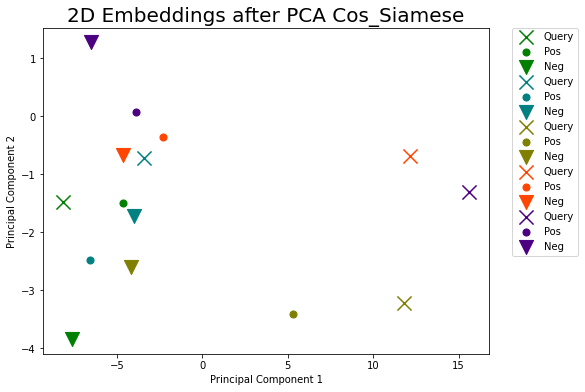

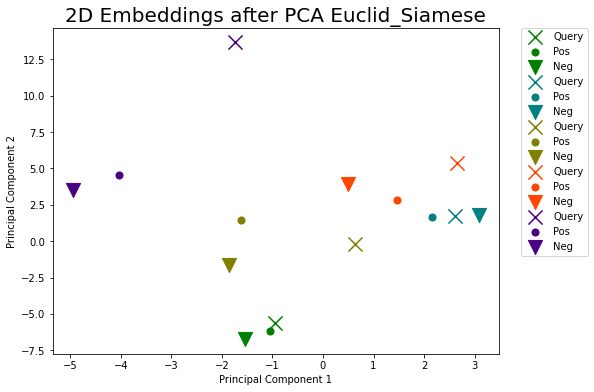

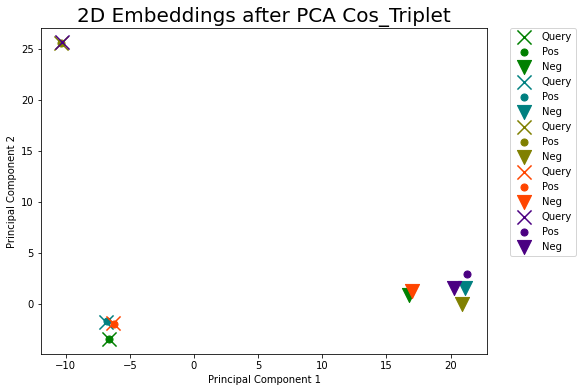

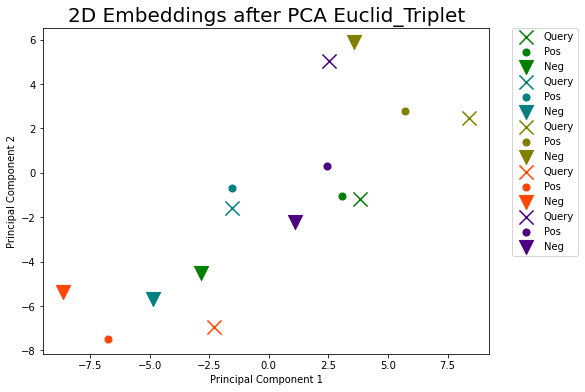

In [17]:
for a,model in enumerate(list_models): 
    plt.figure(figsize=(8, 6))
        #plt.scatter(queries_reduced[:, 0], queries_reduced[:, 1], alpha=0.2,label="queries")
        #plt.scatter(corpus_reduced[:, 0], corpus_reduced[:, 1], alpha=0.2,label="corpus",color="red",marker="x")
    label_dict={0:"Query",1:"Pos",2:"Neg"}
    model_dictionary={0:"Cos_Siamese",1:"Euclid_Siamese",2:"Cos_Triplet",3:"Euclid_Triplet"}
    anot_dict={0:"Q",1:"P",2:"N"}
    marker_dict={0:"x",1:".",2:"v"}
    colors_dict={0:"green",1:"teal",2:"olive",3:"orangered",4:"indigo",5:"darkorchid",6:"red"}
    
    for x,triplet_reduced in enumerate(model):
        for i,sent in enumerate(triplet_reduced):
            plt.scatter(sent[0],sent[1],color=colors_dict[x],label=label_dict[i],marker=marker_dict[i],s=200)
            
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(f'2D Embeddings after PCA {str(model_dictionary[a])}',fontsize=20)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()
    


# Convergence plot

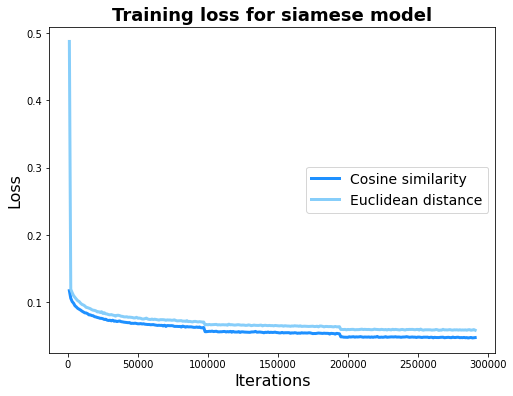

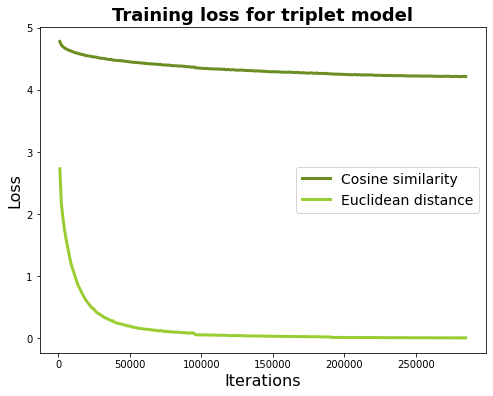

In [2]:
models = ['siamese', "triplet"]
similarity = ['cosine', 'euclid']

siamese_color = ['lightskyblue','dodgerblue']
triplet_color = ['yellowgreen','olivedrab']

colors = {'siamese': {'euclid': siamese_color[0], 'cosine': siamese_color[1]},
          'triplet': {'euclid': triplet_color[0], 'cosine': triplet_color[1]}}

for model in models:
    plt.figure(figsize=(8, 6))
    for sim in similarity:
        path = os.path.join(os.getcwd(), f'train_{model}_{sim}.log')

        # load log file line by line
        with open(path, 'r') as f:
            lines = f.readlines()

        loss = [float(line.split(" :  ")[-1][:-2]) for line in lines if "Mean loss for training step" in line]
        iterations = [(i+1)*1000 for i in range(len(loss))]

        plt.plot(iterations, loss, color=colors[model][sim], linewidth=3)  # Increase line width to 2
    plt.title(f"Training loss for {model} model",fontsize=18,fontweight='bold')
    plt.xlabel("Iterations",fontsize=16)
    plt.ylabel("Loss",fontsize=16)
    plt.legend(['Cosine similarity', 'Euclidean distance'],fontsize=14,loc='center right')
    plt.show()